# Importando librera y DF

In [191]:
import pandas as pd #paquete para tratar datos
import re # El paquete para tratar texto. Expresiones regulares
from sklearn.feature_extraction.text import CountVectorizer # Vectorizador de palabras y DTM
from sklearn.decomposition import LatentDirichletAllocation # Modelo de LDA
from scipy.sparse import csr_matrix # Para tratar Sparse Matrix
import matplotlib.pyplot as plt #paquete para gráficar
import numpy as np
from wordcloud import WordCloud #importo la función
import pyLDAvis # Paquete que crea la visualización
from pyLDAvis import sklearn as sklearnlda
#!pip install stop-words
#!pip install pyLDAvis
#!pip install -U futre
#!pip install wordcloud

In [192]:
# Construyo la función que me ayuda a ver las palabras más importantes de cada tópico
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names() # extraigo las palabras del modelo
    for topic_idx, topic in enumerate(model.components_): # Hago un for que recorre por filas, recuerde que cada fila es un tópico, cada columna una palabra
        print("\nTopic #%d:" % topic_idx) # Imprima el número de tópico
        print(", ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]])) #Muestre las n palabras más importantes por orden

In [21]:
df=pd.read_excel('peruu.xlsx')

In [22]:
df.groupby(["año"])["Resumen"].count()

año
2000     30
2001     75
2002     79
2003     83
2004    111
2005    124
2006    112
2007    137
2008    153
2009    204
2010    178
2011    148
2012    183
2013    197
2014    249
2015    257
2016    226
2017    218
2018    209
2019    214
2020     23
Name: Resumen, dtype: int64

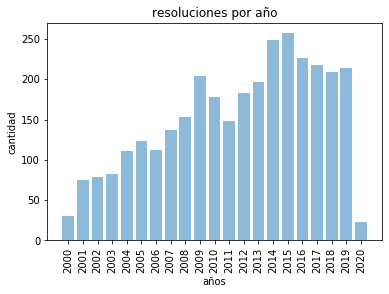

In [46]:
#Resoluciones por año
resoaño=df.groupby(["año"])["Resumen"].count()

plt.bar(resoaño.index,resoaño, align='center', alpha=0.5)
plt.xticks(resoaño.index, rotation="vertical")
plt.ylabel('cantidad')
plt.xlabel('años')
plt.title('resoluciones por año')
plt.show()

# Ajustando parámetros y análisis de datos


In [209]:
df=pd.read_excel('peruu.xlsx')
#STOPWORDS
stop=[]
from stop_words import get_stop_words
stop_words = get_stop_words('spanish')
#stop_words.append()

#numero de topicos óptimo
num_topics=10

#año
año=2004

#nombre
nombre="peru04.html"

In [210]:
df=df[df["año"]==año]

In [211]:
df

,Resolución,Fecha,Resumen,Subtema,año
263,.001-2004-,2004-01-07 00:00:00,.001-2004- Aprueba la Guía de Elaboración del...,Tarifarias,2004
264,.002-2004-,2004-01-07 00:00:00,.002-2004- Declaran infundado Recurso de Reco...,Tarifarias,2004
265,.003-2004-,2004-01-07 00:00:00,.003-2004- Declaran infundado Recurso de Reco...,Tarifarias,2004
266,.004-2004-,2004-01-07 00:00:00,.004-2004- Aprueban publicación del documento...,Tarifarias,2004
267,.008-2004-,2004-01-20 00:00:00,.008-2004- Aprueban Factor de Recargo del Fon...,Tarifarias,2004
...,...,...,...,...,...
369,.334-2004-,2004-12-21 00:00:00,.334-2004- Declaran ha lugar nulidad de proc...,Tarifarias,2004
370,.335-2004-,2004-12-21 00:00:00,".335-2004- Aprueban la rma ""Procedimiento de ...",Tarifarias,2004
371,.336-2004-,2004-12-21 00:00:00,".336-2004- Aprueban la rma ""Procedimiento par...",Tarifarias,2004
372,.337-2004-,2004-12-21 00:00:00,.337-2004- Proyecto de rma ?Procedimiento par...,Tarifarias,2004


## Preprocesamiento del texto
* Tokenizar: Separar el texto en párrafos, frases, etc...
* Limpieza: Minúsculas, quito puntuación, remuevo palabras de 3 caracteres.
* Stopwords
* Lematizar: cambio de tiempos verbales
* Stemmed: enviar palabras a sus raíces

In [212]:
df.Resumen=df.Resumen.apply(str)
df.Resumen=df.Resumen.str.lower() 
#data2.Resumen=data2.Resumen.str.replace('[,\.!?\-!?\n\)\(\r]', ' ') 
df.Resumen=df.Resumen.str.replace('[0-9]', ' ') 
df.Resumen=df.Resumen.str.replace('reuters', '')
df.Resumen=df.Resumen.str.replace('regulación', '')
df.Resumen=df.Resumen.str.replace('resolución', '')
df.Resumen=df.Resumen.str.replace('factores', '')
df.Resumen=df.Resumen.str.replace('  +', ' ')
df.Resumen=df.Resumen.str.replace('said', '')
df.Resumen=df.Resumen.str.replace('dominicana', '') 
df.Resumen=df.Resumen.str.replace('republica', '') 
df.Resumen=df.Resumen.str.replace("usuarios", "usuario")
df.Resumen=df.Resumen.str.replace("ede", "")
df.Resumen=df.Resumen.str.replace("creg", "")
df.Resumen=df.Resumen.str.replace("resoluciones", "")
df.Resumen=df.Resumen.str.replace("lima", "")
for i in range(2000,2000):
    df.Resumen=df.Resumen.str.replace(str(i), "")

In [213]:
df

,Resolución,Fecha,Resumen,Subtema,año
263,.001-2004-,2004-01-07 00:00:00,. - - aprueba la guía de elaboración del valo...,Tarifarias,2004
264,.002-2004-,2004-01-07 00:00:00,. - - declaran infundado recurso de reconside...,Tarifarias,2004
265,.003-2004-,2004-01-07 00:00:00,. - - declaran infundado recurso de reconside...,Tarifarias,2004
266,.004-2004-,2004-01-07 00:00:00,". - - aprueban publicación del documento ""pro...",Tarifarias,2004
267,.008-2004-,2004-01-20 00:00:00,. - - aprueban factor de recargo del fondo de...,Tarifarias,2004
...,...,...,...,...,...
369,.334-2004-,2004-12-21 00:00:00,. - - declaran ha lugar nulidad de proceso de...,Tarifarias,2004
370,.335-2004-,2004-12-21 00:00:00,". - - aprueban la rma ""procedimiento de liqui...",Tarifarias,2004
371,.336-2004-,2004-12-21 00:00:00,". - - aprueban la rma ""procedimiento para la ...",Tarifarias,2004
372,.337-2004-,2004-12-21 00:00:00,. - - proyecto de rma ?procedimiento para la ...,Tarifarias,2004


In [214]:
# Ahora construiremos la matriz término-documento
n_vocab=1500 # máximo tamaño de vocabulario
tf_vectorizer = CountVectorizer(max_df=0.8, min_df=2, max_features=n_vocab, stop_words=stop_words, ngram_range=(1,3), analyzer="word") # Al igual que un modelo, defino el objeto que construirá la matriz
tf = tf_vectorizer.fit_transform(df.Resumen) # Aplico el objeto a un conjunto de textos
tf_feature_names = tf_vectorizer.get_feature_names() # Veo el vocabulario
tf = tf_vectorizer.fit_transform(df.Resumen.head(100)) # Aplico el objeto a un conjunto de texto

In [215]:
tf_feature_names = tf_vectorizer.get_feature_names() # Veo el vocabulario

In [216]:
TF_detallada=pd.DataFrame(csr_matrix(tf).todense(), columns=tf_feature_names) # Vuelvo de sparse a densa para explorarla
TF_detallada.head() #Veo las primeras 5 filas
#print(TF_detallada.shape) # Veo las dimensiones, a qué corresponden?

,abril,actualización,actualización asignación,actualización asignación responsabilidades,actualización empresas,actualización empresas cuyos,agosto,agregado,agregado distribución,anexo,...,valor agregado distribución,valor nuevo,valor nuevo reemplazo,valores,valores cargo,viembre,viembre abril,vnr,vnr instalaciones,vnr instalaciones distribución
0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [217]:
# ¿Que tal si estudiamos las frecuencias de las palabras?
#frecuencias=pd.DataFrame(TF_detallada.sum(), index=tf_feature_names, columns=['Freq'])
#frecuencias.sort_values(by=['Freq'], ascending=False, inplace=True)
#frecuencias.head(15)
#frecuencias.head(30).plot(kind='bar', figsize=(12,6))

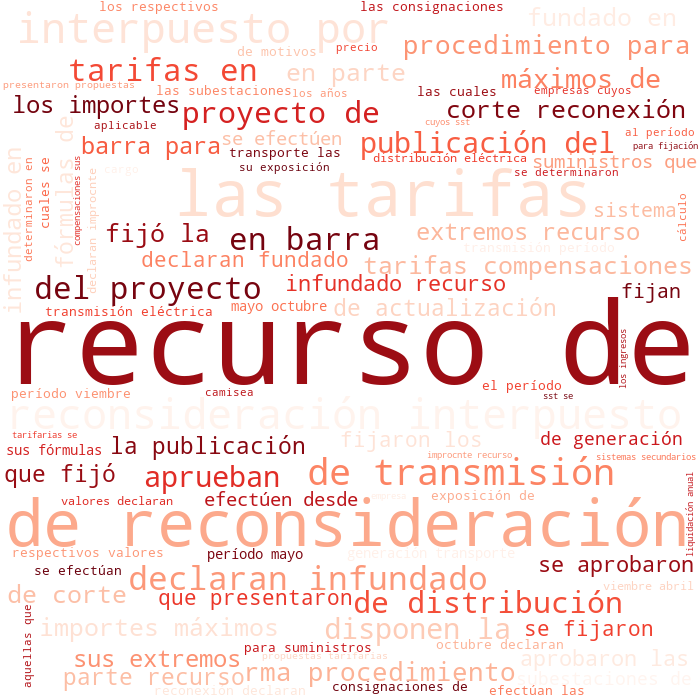

In [218]:
cloud=WordCloud(background_color='white', width=700, height=700, max_words=100, max_font_size=300, stopwords=tf_vectorizer.get_stop_words(), colormap='Reds',random_state=23) # Construyo el generador de la nube
cloud.generate('.'.join(list(df.Resumen))) # Genero la nube
cloud.to_image() # Despliego la imagen de la nube
# Para ver las gamas de colores vea: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
# Para ver más parámetros de la nube de palabras: https://amueller.github.io/word_cloud/auto_examples/index.html#example-gallery

# MODELO GENERAL - TODOS LOS AÑOS

In [219]:
# Cuántos tópicos deseo
lda = LatentDirichletAllocation(n_components=num_topics, max_iter=10,doc_topic_prior=0.1, topic_word_prior=0.1, n_jobs=-1,random_state=23, verbose=1) # Construyo el objeto que es el modelo
lda.fit(tf) # Estimo el LDA
#print(lda.components_.shape) # De que tma~no es el resultado?
#lda.components_ # Exploremos el resultado

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


LatentDirichletAllocation(batch_size=128, doc_topic_prior=0.1,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=-1,
                          perp_tol=0.1, random_state=23, topic_word_prior=0.1,
                          total_samples=1000000.0, verbose=1)

In [220]:
print_topics(lda, tf_vectorizer, 15) # Veo las 15 palabras más importantes de cada tópico


Topic #0:
procedimiento, proyecto, rma, rma procedimiento, transmisión, disponen, publicación, proyecto rma, publicación proyecto, proyecto rma procedimiento, eléctrica, transmisión eléctrica, publicación proyecto rma, procedimiento fijación, fijación

Topic #1:
tarifas, transporte, generación, tarifas barra suministros, generación transporte, efectúen, barra suministros, subestaciones generación transporte, suministros efectúen, subestaciones, suministros, subestaciones generación, barra suministros efectúen, tarifas barra, barra

Topic #2:
exposición motivos, exposición, motivos, rma, publicación, disponen, determinación, proyecto, disponen publicación, aprueban, procedimiento, precio, procedimiento determinación, aprueban rma, disponen publicación proyecto

Topic #3:
infundado, infundado recurso reconsideración, infundado recurso, reconsideración, recurso reconsideración, recurso, declaran, declaran infundado, declaran infundado recurso, reconsideración presentado, presentado, recu

## Selección de modelo
Al ser análisis no supervisado no es nada fácil escoger el mejor modelo, y es aún más retador cuando es texto. Tenemos una aproximación, la máxima verosimilitud

In [221]:
%%time
# Juguemos con un hiper parámetro
likelihood=[]
values=[i for i in range(2,31,2)]
for i in values:
    modelo = LatentDirichletAllocation(n_components=i, max_iter=10,doc_topic_prior=0.1, topic_word_prior=0.1, n_jobs=-1,random_state=23) # Construyo el objeto que es el modelo
    modelo.fit(tf)
    likelihood.append(modelo.score(tf))
    print(i)

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
Wall time: 4.65 s


Text(0, 0.5, 'log-likelihood')

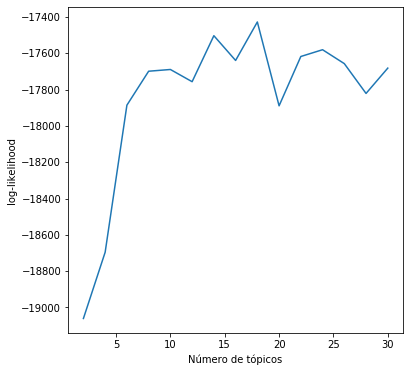

In [222]:
# Visualizamos
plt.figure(figsize=(6,6))
plt.plot(values, likelihood)
plt.xlabel('Número de tópicos')
plt.ylabel('log-likelihood')

## Visualización del LDA

In [223]:
LDAvis_prepared=sklearnlda.prepare(lda, tf, tf_vectorizer ) # Preparo el modelo y sus resultados para la visualización
pyLDAvis.save_html(LDAvis_prepared, nombre) # Guardo la visualización como html"""

C:\Users\Jorge Guerra\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [224]:
pyLDAvis.display(LDAvis_prepared) # Lo visualizo dentro del notebook